In [17]:
"""
@file sobel_demo.py
@brief Sample code using Sobel and/or Scharr OpenCV functions to make a simple Edge Detector
"""
import sys
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
def func1(image):
    
    # Intro
    window_name = ('Sobel Demo - Simple Edge Detector')
    scale = 1
    delta = 0
    ddepth = cv.CV_16S
    
    # Read image
    src = cv.imread(image, cv.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image: ' + image)
        return -1
    else:
        print("success")
    
    # Display source image
    plt.figure()
    plt.title("Original image")
    plt.imshow(src)
    
    # Apply Gaussian Blur and greyscale
    src = cv.GaussianBlur(src, (5, 5), 0)
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    
    # Erode and dilate
    kernel = np.ones((3, 3), np.uint8)
    opening = cv.morphologyEx(gray, cv.MORPH_OPEN, kernel, iterations=2)
    
    # Sobel filter
    grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    # Gradient-Y
    # grad_y = cv.Scharr(gray,ddepth,0,1)
    grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)
    grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    # Show Sobel result
    plt.figure()
    plt.title("Sobel Filter")
    plt.imshow(grad)
    
    # Scharr filter
    grad_x = cv.Scharr(gray, ddepth, 1, 0, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    # Gradient-Y
    # grad_y = cv.Scharr(gray,ddepth,0,1)
    grad_y = cv.Scharr(gray, ddepth, 0, 1, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)
    grad2 = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    # Show Scharr result
    plt.figure()
    plt.title("Scharr Filter")
    plt.imshow(grad2)
    
    # Use Canny edge detection (Sobel is in this already)
    edges = cv.Canny(opening,30,60)
    plt.figure()
    plt.title("Canny Edge Detection")
    plt.imshow(edges)
    
    # Erode then dilate after Canny
    canny2 = cv.morphologyEx(edges, cv.MORPH_OPEN, kernel, iterations=2)
    #plt.figure()
    #plt.title("Canny Edge Detection after morphology")
    # plt.imshow(canny2)
    
    # Threshold
    ret3,th3 = cv.threshold(gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    ret, thresh = cv.threshold(gray, 40, 255, 0)
    plt.figure()
    plt.title("Threshold")
    plt.imshow(th3)
    
    # Draw contours 
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
    dilated = cv.dilate(grad2, kernel)
    contours, hierarchy = cv.findContours(dilated, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    s_cnt = [cnt for cnt in contours if cv.contourArea(cnt) > 100]
    # s_cnt = contours
    cnt = cv.drawContours(src, s_cnt, -1, (255, 255, 0), 3)
    plt.figure()
    plt.title("Contours")
    # plt.imshow(cnt)
    
    
    return 0


success
success
success
success


C:\Users\HP Pavilion\anaconda3\envs\internship2021\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


0

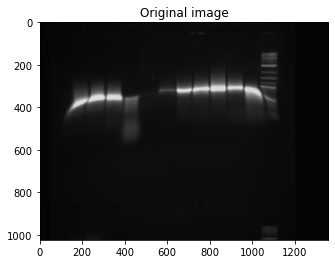

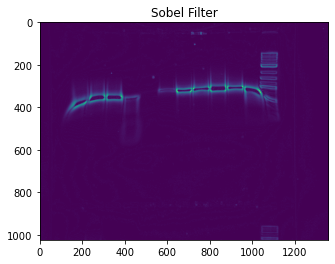

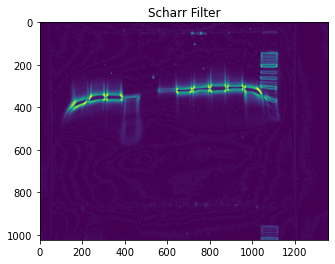

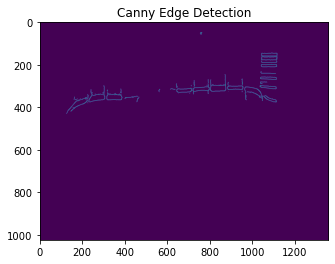

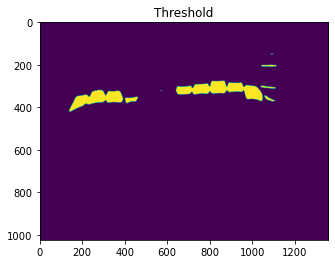

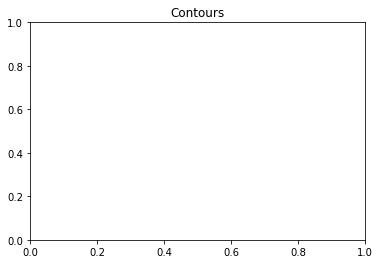

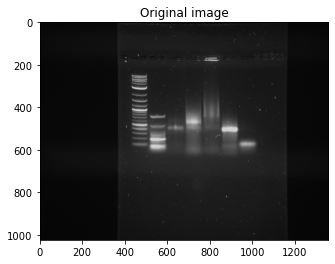

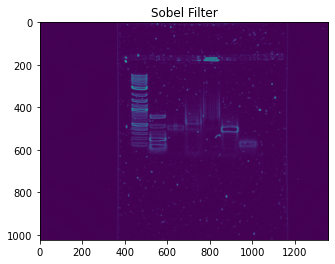

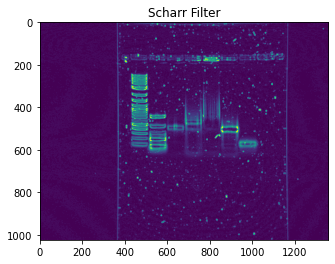

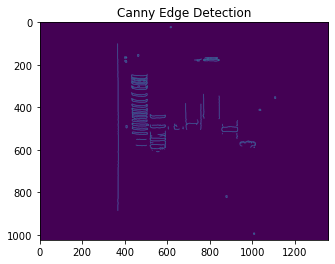

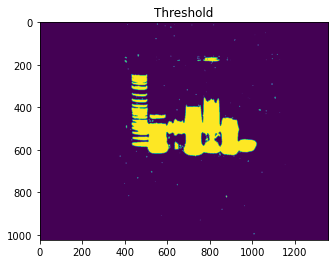

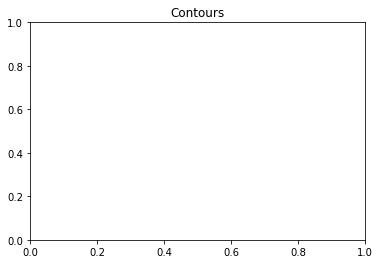

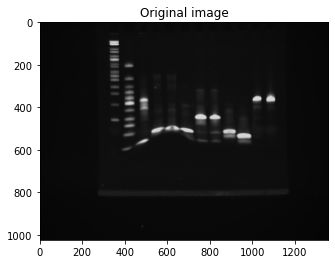

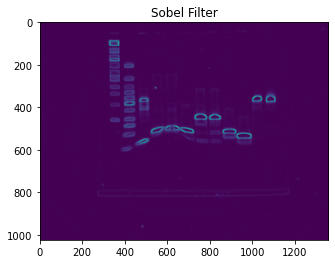

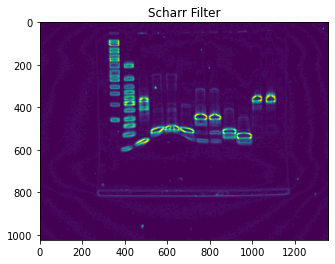

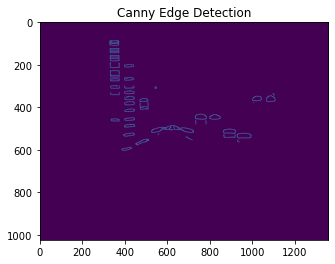

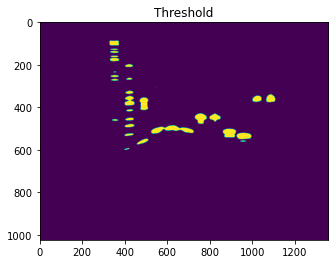

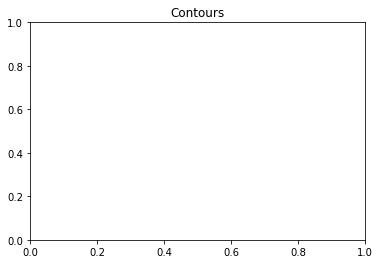

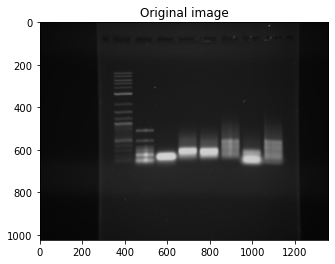

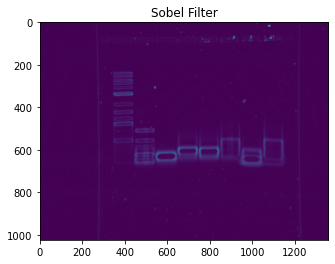

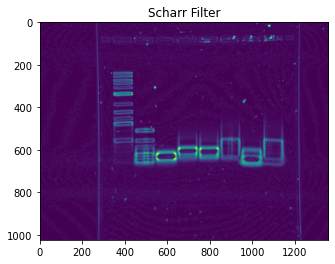

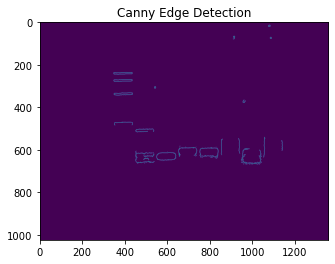

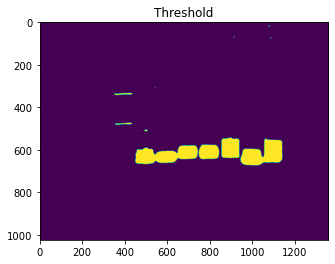

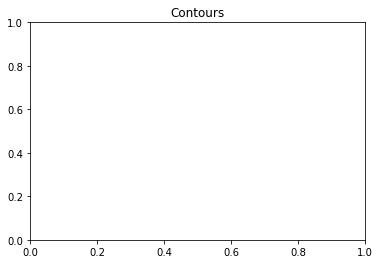

In [18]:
func1("../samples/2_side_A.tif")
func1("../samples/2-good.jpg")
func1("../samples/5.tif")
func1("../samples/image3.tif")

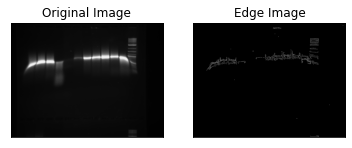

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread("../samples/2_side_A.tif",0)
edges = cv.Canny(img,20,60)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

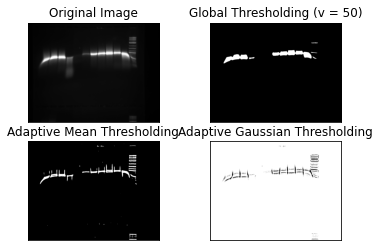

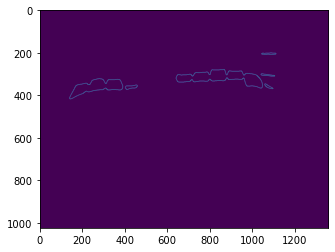

In [14]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread("../samples/2_side_A.tif",0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,90,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,21,-3)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 50)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

edges = cv.Canny(th1,20,60)
plt.figure()
plt.imshow(edges)

[INFO] using *fast* selective search
[INFO] selective search took 13.5514 seconds
[INFO] 475 total region proposals


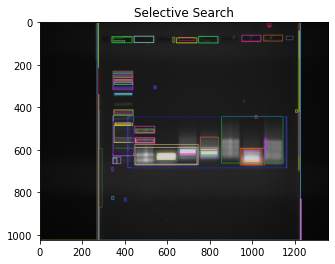

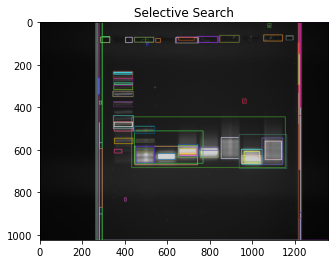

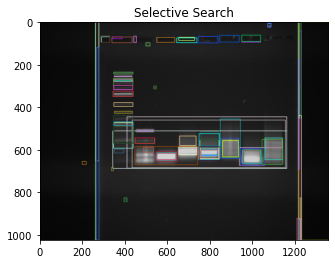

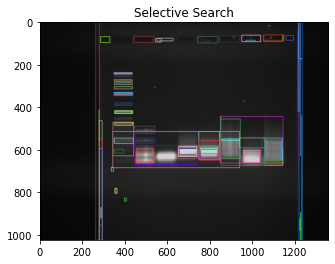

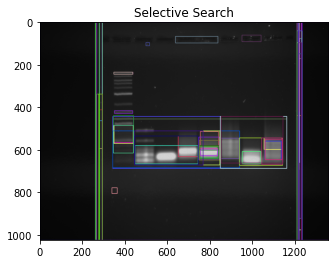

In [5]:
# import the necessary packages
import argparse
import random
import time
import cv2
import matplotlib.pyplot as plt

fast = True

# load the input image
image = cv2.imread("../samples/image3.tif")
# initialize OpenCV's selective search implementation and set the
# input image
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)
# check to see if we are using the *fast* but *less accurate* version
# of selective search
if fast:
    print("[INFO] using *fast* selective search")
    ss.switchToSelectiveSearchFast()
# otherwise we are using the *slower* but *more accurate* version
else:
    print("[INFO] using *quality* selective search")
    ss.switchToSelectiveSearchQuality()
    
# run selective search on the input image
start = time.time()
rects = ss.process()
end = time.time()

# show how along selective search took to run along with the total
# number of returned region proposals
print("[INFO] selective search took {:.4f} seconds".format(end - start))
print("[INFO] {} total region proposals".format(len(rects)))

# loop over the region proposals in chunks (so we can better
# visualize them)
for i in range(0, len(rects), 100):
    # clone the original image so we can draw on it
    output = image.copy()
    # loop over the current subset of region proposals
    for (x, y, w, h) in rects[i:i + 100]:
        # draw the region proposal bounding box on the image
        color = [random.randint(0, 255) for j in range(0, 3)]
        cv2.rectangle(output, (x, y), (x + w, y + h), color, 2)
    # show the output image
    plt.figure()
    plt.title("Selective Search")
    plt.imshow(output)
    # cv2.imshow("Output", output)
    key = cv2.waitKey(0) & 0xFF
    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break

C:\Users\HP Pavilion\anaconda3\envs\internship2021\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.


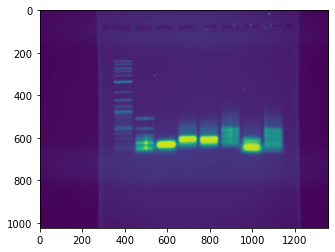

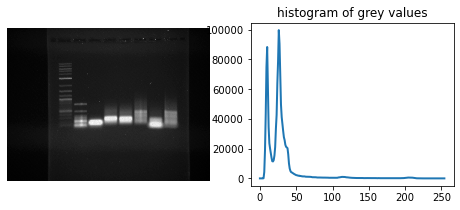

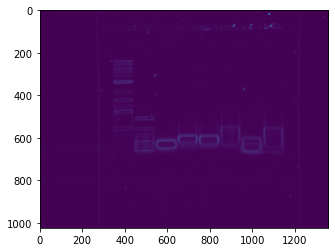

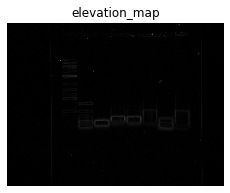

C:\Users\HP Pavilion\anaconda3\envs\internship2021\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,
C:\Users\HP Pavilion\anaconda3\envs\internship2021\lib\site-packages\ipykernel_launcher.py:75: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.


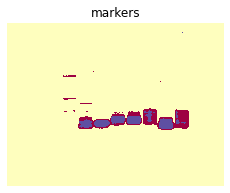

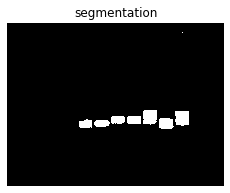

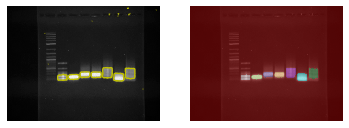

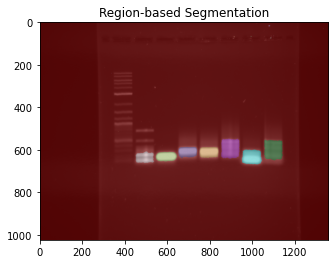

In [13]:
from skimage.filters import sobel
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from skimage import data
from skimage.feature import canny
from scipy import ndimage as ndi
from skimage import morphology
import skimage
import imagecodecs
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray


# 0 - Load input image
# cvimage = cv2.imread("../samples/2_side_A.tif")
# image = img_as_float(cvimage)
# image = data.coins()
# image = skimage.io.imread("../samples/2_side_A.tif", "tiffile")
image = image.imread("../samples/image3.tif")
image = rgb2gray(image)
image = img_as_ubyte(image)
plt.figure()
plt.imshow(image)



#print(image)
hist = np.histogram(image, bins=np.arange(0, 256))
#print(hist)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax1.axis('off')
ax2.plot(hist[1][:-1], hist[0], lw=2)
ax2.set_title('histogram of grey values')
plt.show()


# 1
elevation_map = sobel(image)
plt.figure()
plt.imshow(elevation_map)


fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')
plt.show()

# 2
markers = np.zeros_like(image)
markers[image < 70] = 1  # <120
markers[image > 120] = 2  # >190

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(markers, cmap=plt.cm.Spectral, interpolation='nearest')
ax.axis('off')
ax.set_title('markers')

#3
segmentation = morphology.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('segmentation')

#4
from skimage.color import label2rgb

segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_coins, _ = ndi.label(segmentation)
image_label_overlay = label2rgb(labeled_coins, image=image)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), sharex=True, sharey=True)
ax1.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax1.contour(segmentation, [0.5], linewidths=1.2, colors='y')
ax1.axis('off')
ax1.set_adjustable('box')
ax2.imshow(image_label_overlay, interpolation='nearest')
ax2.axis('off')
ax2.set_adjustable('box')

# fig.subplots_adjust(**margins)

##
plt.show()

plt.figure()
plt.title("Region-based Segmentation")
plt.imshow(image_label_overlay)